# Exercise 4.1.6 Bike Sharing Hourly, Linear Regression

The regression model is a statistical procedure that allows a researcher to estimate the linear, or straight line, relationship that relates two or more variables.

Develop the code to obtain a linear regression model (W's) using the 'hour.csv' dataset of the Bike Sharing example.


### Instructions:

1. Load the Bike-sharing hourly dataset
2. Drop the columns ['instant', 'dteday', 'casual', 'registered']
3. Verify that there are not null values
4. Convert to numpy matrix the attributes and the ouput 'cnt' 
5. Add the columns of number 1
6. Split the dataset into Training and Testing sets
7. Use the algorithm developed in M_4_1_5 exercise to:
    - Obtain the Training and Testing costs of the dataset for different testing size data.
    - Obtain the Training and Testing costs of the dataset for different polinomial grades (from 1 to 3)
    

In [8]:
#Import libraries
import math
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from numpy.linalg import norm
from numpy.random import rand
import math
from sklearn.preprocessing import StandardScaler

In [9]:
#1. Load the dataset and convert to numpy arrays

def loadCsv(filename):
    dataset = np.array(data)
    m, n = np.shape(dataset)
    x = dataset[:, 0:n-1]
    y = dataset[:, -1]
    y = np.reshape(y ,(m,1))
    
    return x, y

#Testing
filename = 'hourly.csv'
data = pd.read_csv(filename)
#2. Drop the columns ['instant', 'dteday', 'casual', 'registered']
data.drop(columns=['instant', 'dteday', 'casual', 'registered'], inplace=True) 
#3. Verify that there are not null values
data.info()
x, y = loadCsv(filename)
# 4. Convert to numpy matrix the attributes and the ouput 'cnt' 
print('X size:',np.shape(x), 'Y size:',  np.shape(y))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 1.7 MB
X size: (17379, 12) Y size: (17379, 1)


In [10]:
def addOnes(X):
    X1 = np.array(X)
    m, n = np.shape(X1)
    ones = np.ones((m, 1))
    X1 = np.concatenate((ones, X1), axis=1)
    return X1


def mse(Y, Yt):
    residual = Y - Yt
    cost = np.dot(residual.T, residual) / len(Y)
    return cost


def gradient(X, Y, W):
    residual = Y - np.dot(X, W.T)
    grad = -2 * np.dot(X.T, residual)
    return grad


def GD(X, Y, W, alpha, epsilon, iterations):
    grad = gradient(X, Y, W)
    gradNorm = np.linalg.norm(grad)
    Yt = np.dot(X, W.T)
    cost = mse(Y, Yt)
    it = 0
    # Lista donde guardaremos el valor del error (MSE) en cada iteración
    J = []

    while gradNorm > epsilon and it < iterations:

        # calcular gradiente
        grad = gradient(X, Y, W)
        gradNorm = np.linalg.norm(grad)

        # Actualizar W
        W = W - alpha * grad.T

        # Incrementar contador de iteraciones
        it += 1

        # Calcular la predicción y el error (MSE)
        Yt = np.dot(X, W.T)
        cost = mse(Y, Yt)

        # Guardar el vector del error
        J.append(float(cost))

    return W, it, J


In [11]:
# Escalar X

scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [12]:
testsize = np.arange(0.1, 1, 0.1)

print(testsize)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [14]:
alpha = 0.00001
epsilon = 0.01
itera = 100000
costosTraining = [] 
costosTesting = []

# paso 6 para cada tamaño de test size
for tsize in testsize:
    #split dataset
    xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = tsize , random_state = 0)

    #añadir 1s a xTrain y xTest
    xTr = addOnes(xTrain)
    xTe = addOnes(xTest)

    #inicializar w de forma aleatoria
    m,n = np.shape(xTr)
    init_w = np.random.rand(1,n)

    print("Testsize: ", tsize)

    #GD
    w, iterations, J = GD(xTr, yTrain, init_w, alpha, epsilon, itera)

    #calcular costos
    cTr = mse(yTrain, np.dot(xTr, w.T)) #testing
    cTe = mse(yTest, np.dot(xTe, w.T))

    print("Training cost:", cTr)
    print("Training cost:", cTe)


    #Guardar en listas de costos 
    costosTraining.append(cTr)
    costosTesting.append(cTe)


Testsize:  0.1
Training cost: [[20128.78510364]]
Training cost: [[19915.40893066]]
Testsize:  0.2
Training cost: [[20157.73828965]]
Training cost: [[19925.40213187]]
Testsize:  0.30000000000000004
Training cost: [[20211.61276082]]
Training cost: [[19883.46078449]]
Testsize:  0.4
Training cost: [[20178.12473137]]
Training cost: [[20030.73631747]]
Testsize:  0.5
Training cost: [[20218.94772611]]
Training cost: [[20043.53109348]]
Testsize:  0.6
Training cost: [[20329.00639298]]
Training cost: [[19998.28962531]]
Testsize:  0.7000000000000001
Training cost: [[20484.95704037]]
Training cost: [[20008.13365915]]
Testsize:  0.8
Training cost: [[19657.96197374]]
Training cost: [[20268.02563773]]
Testsize:  0.9
Training cost: [[20770.81061313]]
Training cost: [[20109.0648842]]


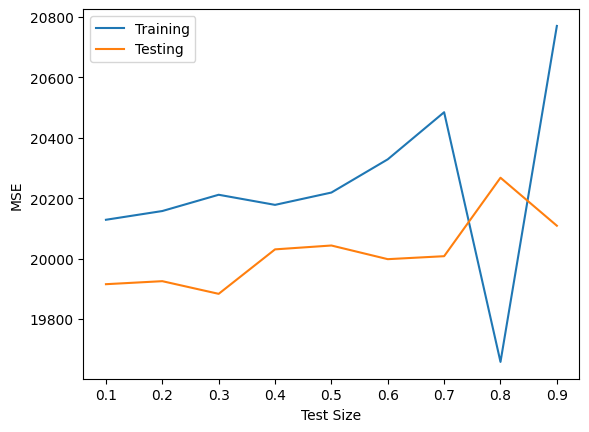

In [15]:
costosTraining = np.array(costosTraining)
costosTesting = np.array(costosTesting)

costosTraining = costosTraining.reshape(-1,1)
costosTesting = costosTesting.reshape(-1,1)

plt.plot(testsize,costosTraining, label = 'Training')
plt.plot(testsize,costosTesting, label = 'Testing')

plt.xlabel('Test Size')
plt.ylabel('MSE')

plt.legend()


X size: (17379, 12) Y size: (17379, 1)
Grade: 1
W:  (1, 13)
Iteraciones: 100000
Training cost: [[34162.44679022]]
Testing cost: [[34648.05781742]]
Grade: 2
W:  (1, 25)
Iteraciones: 100000
Training cost: [[31818.65407704]]
Testing cost: [[31825.77671018]]
Grade: 3
W:  (1, 37)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Iteraciones: 100000
Training cost: [[19115.43836416]]
Testing cost: [[19599.56406515]]


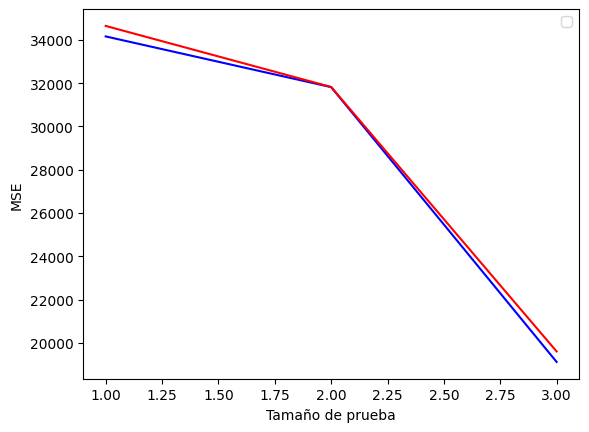

In [20]:
# Incializar parámetros
alpha = 0.00000000001
#Precisión (qué tan cercano a cero debe estar el error) margen de error permitido
epsilon = 0.01
#Número máximo de iteraciones (es útil para que el algoritmo no se cicle)
itera = 100000

#lista de costos para cada prueba 
costosTraining = [] 
costosTesting = []

#nuevas variables

#Random 
seed = 1

#elegir el testsize con menor error
testsize = 0.3

#variable para formar matrices polinomiales
xtemp = x

#Grados que voy a evaluar del 1-4
poly = range(1,4)

filename = 'bike-day.csv'
x, y = loadCsv(filename)
print('X size:',np.shape(x), 'Y size:',  np.shape(y))

# Para cada grado polinomial realizar el gradiente descendente, obtener W's y calcular el MSE (error o costo)
for grade in poly:
    print('Grade:', grade)

    if grade == 1:
        xtemp = x
    else:
        xtemp = np.concatenate((xtemp, x**(grade)),axis =1)
    # Añadir unos a la matriz polinomial
    x_1s = addOnes(xtemp)
    
    # Split dataset en Training and Testing
    xTrain, xTest, yTrain, yTest = train_test_split(x_1s, y, test_size = tsize , random_state = seed)
    yTrain = yTrain.reshape(-1,1)
    yTest = yTest.reshape(-1,1)
    
    # Incializar W de forma aleatoria
    m,n = np.shape(xTrain)
    init_w = np.random.rand(1,n)

    print('W: ',init_w.shape)

    # Obtener W y el error MSE (J) a través del GD
    w, it, J = GD(xTrain, yTrain, init_w, alpha, epsilon, itera)
    
    #Imprimir la iteración it
    print('Iteraciones:', it)
    
    #Calcular errores MSE de Training y Testing  
    cTr = mse(yTrain, np.dot(xTrain, w.T)) #testing
    cTe = mse(yTest, np.dot(xTest, w.T))
    
    print("Training cost:", cTr)
    print("Testing cost:", cTe)

    #Guardar en listas de costos 
    costosTraining.append(cTr)
    costosTesting.append(cTe)

#Convertir a arrays las listas
costosTraining = np.array(costosTraining)
costosTesting = np.array(costosTesting)

#Adecuar dimensiones
costosTraining = costosTraining.reshape(len(costosTraining), 1)
costosTest = costosTesting.reshape(len(costosTesting), 1)


##Graficar los errores con respecto al grado
plt.plot(poly, costosTraining, 'b')
plt.plot(poly, costosTest, 'r')



plt.xlabel('Tamaño de prueba')
plt.ylabel('MSE')
plt.legend()



(15642,)
(15642,)
           Y       Ypred
0      389.0  236.514932
1      146.0  255.882730
2      152.0  274.174751
3      188.0  150.059167
4       62.0  266.782708
...      ...         ...
15637   20.0  117.048934
15638  517.0  175.897366
15639  137.0  269.752778
15640  120.0  218.480887
15641   16.0   58.475993

[15642 rows x 2 columns]
           Y       Ypred
1167     1.0   42.359966
2038     1.0   54.827199
1417     1.0   79.485432
3912     1.0   58.652197
8354     1.0   76.652496
...      ...         ...
504    967.0  370.898675
180    968.0  317.111667
14462  970.0  329.805747
4594   976.0  327.479132
1216   977.0  317.065468

[15642 rows x 2 columns]
[ 42.35996592  54.82719856  79.48543228 ... 329.80574711 327.47913175
 317.06546752]


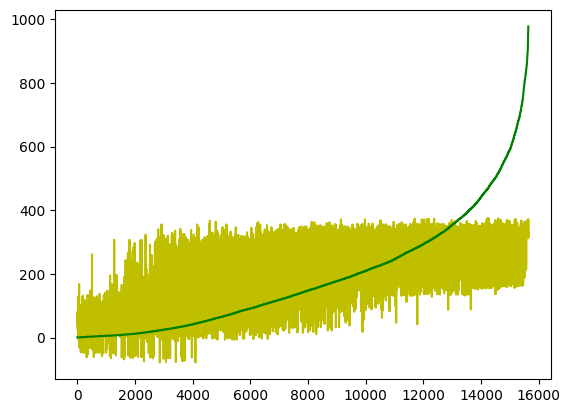

In [21]:
predTest = np.dot(xTest, w.T)
pT = predTest.reshape(len(predTest))
print(pT.shape)
yT = yTest.reshape(len(yTest))
print(yT.shape)
Ys = np.column_stack((yT,pT))
#print(Ys)
df_Ys = pd.DataFrame(data = Ys, columns = ['Y', 'Ypred'])
print(df_Ys)
df1 = df_Ys.sort_values(by=['Y'], ascending=True)
print(df1)
y1 = np.array(df1['Y'])
y2 = np.array(df1['Ypred'])
print(y2)
plt.plot(y2, 'y')
plt.plot(y1, 'g')
#plt.plot(y1,y2)

# Conclusion
Durante el desarrollo de la presente actividad, se llevó a cabo un análisis riguroso con el objetivo de determinar la configuración más adecuada para el tamaño del dataset utilizado en el modelo de entrenamiento y pruebas. Los resultados obtenidos demostraron que una partición del dataset en un 70% para el entrenamiento y un 30% para las pruebas, permitió lograr un mejor rendimiento en la predicción de los valores objetivo.

Además, se identificó que el grado del polinomio utilizado para el ajuste del modelo también es un factor importante que influye en el costo del mismo. En este sentido, se observó que una reducción en el grado del polinomio puede disminuir el costo del modelo. No obstante, es importante destacar que este efecto no necesariamente se presenta de forma lineal, es decir, un aumento en el grado del polinomio no implica necesariamente un incremento proporcional en el costo del modelo.

En este contexto, resulta fundamental realizar una selección adecuada de los datos para determinar el grado de polinomio que mejor se ajuste al conjunto de datos utilizado, a fin de garantizar una predicción precisa y óptima en la tarea de aprendizaje automático en cuestión.